<a href="https://colab.research.google.com/github/suelen-prs/EBAC/blob/main/mod26_Tarefa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [2]:
df.head()

,p1,p2
0,6.964692,7.943428
1,2.861393,5.099537
2,2.268515,0.974429
3,5.513148,4.474359
4,7.194690,8.938402


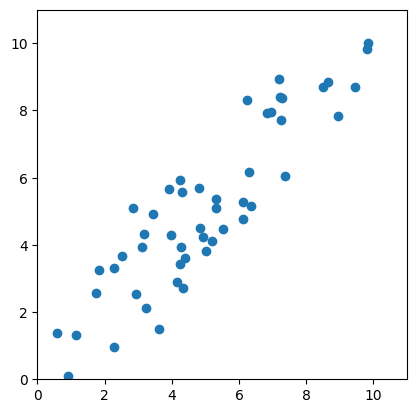

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal', 'box')
ax.set(xlim=(0, 11), ylim=(0, 11))
plt.scatter(x = df.p1, y=df.p2);

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

In [11]:
df['média'] = df.mean(axis=1)
df['evolução'] = df.p2-df.p1
df.style.format(precision=1, decimal=',')

,p1,p2,média,evolução
0,"7,0","7,9","5,8","1,0"
1,"2,9","5,1","3,5","2,2"
2,"2,3","1,0","0,9","-1,3"
3,"5,5","4,5","3,5","-1,0"
4,"7,2","8,9","6,5","1,7"
5,"4,2","3,4","2,7","-0,8"
6,"9,8","9,8","7,4","0,0"
7,"6,8","7,9","5,8","1,1"
8,"4,8","5,7","4,2","0,9"
9,"3,9","5,7","4,0","1,8"


b) Calcule a correlação entre os dados da p1 e p2

In [18]:
print("Correlação entre p1 e p2:", df.p1.corr(df.p2))

Correlação entre p1 e p2: 0.8957365818728046


c) Calcule a correlação entre os dados transformados (média e diferença)

In [10]:
print("Correlação entre a média e a diferença:", df['média'].corr(df['evolução']))

Correlação entre a média e a diferença: 0.13347385411788837


d) Comente as correlações observadas.

Correlação entre os dados das variáveis p1 e p2:

A forte conexão de 0,89 entre p1 e p2 sugere uma relação intensamente positiva, revelando que estas variáveis movem-se conjuntamente, refletindo um alto grau de similaridade e conexão entre seus dados.

Interação entre os dados ajustados (média e discrepância):

Uma correlação de -0,13 sugere uma fraca associação negativa entre as variáveis ajustadas, indicando que quando uma variável cresce, a outra tende a declinar, e vice-versa. Contudo, este valor próximo a zero (-0,13) reflete uma fraca relação inversa, sugerindo que tal ligação pode ser de menor significância ou consistência.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [12]:
df['soma'] = df.p1+df.p2
df.style.format(precision=1, decimal=',')

,p1,p2,média,evolução,soma
0,"7,0","7,9","5,8","1,0","14,9"
1,"2,9","5,1","3,5","2,2","8,0"
2,"2,3","1,0","0,9","-1,3","3,2"
3,"5,5","4,5","3,5","-1,0","10,0"
4,"7,2","8,9","6,5","1,7","16,1"
5,"4,2","3,4","2,7","-0,8","7,7"
6,"9,8","9,8","7,4","0,0","19,6"
7,"6,8","7,9","5,8","1,1","14,8"
8,"4,8","5,7","4,2","0,9","10,5"
9,"3,9","5,7","4,0","1,8","9,6"


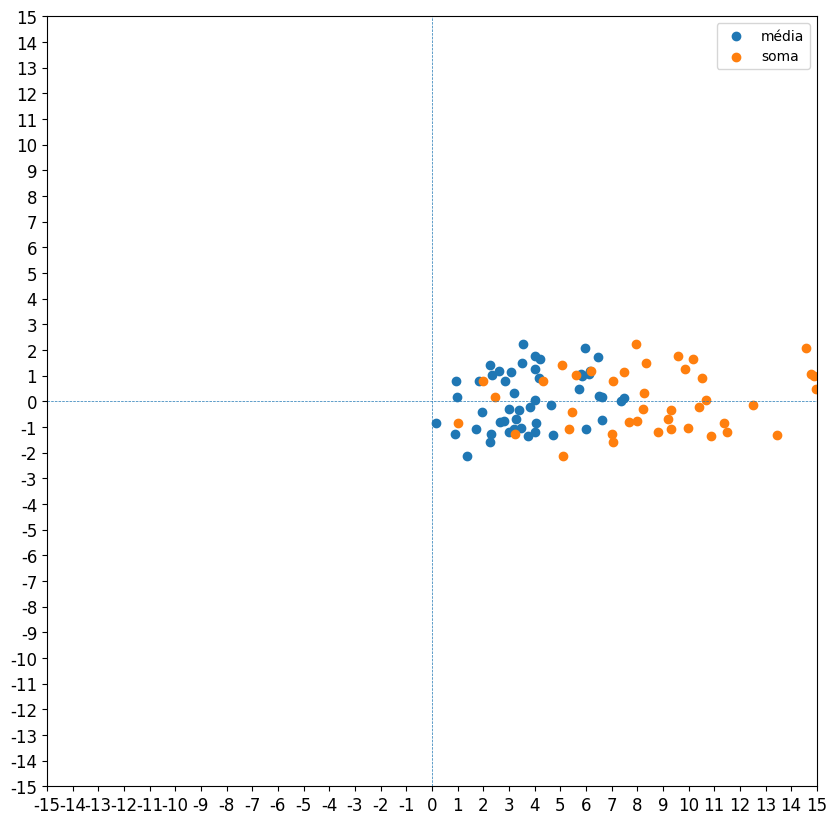

In [17]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)

xmin = -15
xmax = 15
ymin = -15
ymax = 15

# ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

lista_xticks = list(range(int(xmin), int(xmax)+1))
ticksx = ax.set_xticks(lista_xticks)
labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

lista_yticks = list(range(int(ymin), int(ymax)+1))
ticksy = ax.set_yticks(lista_yticks)
labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

#Matriz de transformação
m = np.array([[ .5,.5],
              [ -1, 1]])

ax.axvline(0, linewidth=.5, linestyle='--')
ax.axhline(0, linewidth=.5, linestyle='--')

# Plotar a média
plt.scatter(df['média'], df['evolução'], label='média')

# Plotar a soma
plt.scatter(df['soma'], df['evolução'], label='soma')

#Legenda
plt.legend()